# Which Segment Streams More Revenue?

In this project, a telecommunication operator company is analysing its two lines of service for the revenue they generate. The company wants to know which segment it should focus its marketing resource on. 

Data of 500 clients are given, on their personal information like name, age, city they live in, and so on, along with the plan they subscribe to. Data on each client's use of service for calls, internet and messages also are given.

The goals of this analysis are:
1. To understand how each telco plan generates different revenue amount
2. To understand how clients in city NY-NJ contributes different revenue amount
3. To understand how clients' behavior of each of two plans are different in using call, internet, and message service.

## Data Pre-processing

### Load Data and Import Libraries

In [3]:
# import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from math import factorial
from scipy import stats as st

In [2]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# load all datasets
users = pd.read_csv('/content/gdrive/MyDrive/data_projects/megaline_users.csv')
calls = pd.read_csv('/content/gdrive/MyDrive/data_projects/megaline_calls.csv')
internet = pd.read_csv('/content/gdrive/MyDrive/data_projects/megaline_internet.csv')
messages = pd.read_csv('/content/gdrive/MyDrive/data_projects/megaline_messages.csv')
plans = pd.read_csv('/content/gdrive/MyDrive/data_projects/megaline_plans.csv')

### Data Quality Checking

In [ ]:
# load users general info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# load data sample for users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [ ]:
# change data type
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [ ]:
# Re-check general info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [ ]:
# load calls general info
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
# load data sample for calls
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
# load statistical description
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [ ]:
# change data type
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [ ]:
# Re-check general info
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [ ]:
# load internet general info
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# load data sample for internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [ ]:
# load statistical description
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [ ]:
# change data type
internet['session_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [ ]:
# Re-check general info
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
# load messages general info
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# load data sample for internet
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
# change data type
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [ ]:
# Re-check general info
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
# load plans general info
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
# load data sample for plans
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
# check for duplicates
users.duplicated().sum()

0

In [ ]:
# check for duplicates
calls.duplicated().sum()

0

In [ ]:
# check for duplicates
internet.duplicated().sum()

0

In [ ]:
# check for duplicates
messages.duplicated().sum()

0

All tables for data on calls, messages, and internet contain no missing values.

There is 0 minute use in calls and 0 megabyte in internet. This should be understood as the users making calls that did not go through and no use of the internet data.

Duplicates are checked in tables users, calls, internet, and messages, and not one is found.

Data type for date and time is adjusted.

### Data Improving

In the next steps, additional data and feature engineering are done to enable further steps in analysis.

First, new column for month of every transaction will be added

In [ ]:
# define a function to create the column
def to_month(df,column):
    return df[column].dt.to_period('M')

In [ ]:
# apply function to calls, and check data sample
calls['month'] = to_month(calls, 'call_date')
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


In [ ]:
# apply function to internet, and check data sample
internet['month'] = to_month(internet, 'session_date')
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-27,89.86,2018-12
1,1000_204,1000,2018-12-27,0.00,2018-12
2,1000_379,1000,2018-12-27,660.40,2018-12
3,1000_413,1000,2018-12-28,270.99,2018-12
4,1000_442,1000,2018-12-30,880.22,2018-12


In [ ]:
# apply function to messages, and check data sample
messages['month'] = to_month(messages, 'message_date')
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


Next, round up every minutes of calls, and aggregate to monthly use.

In [ ]:
# round up calls
calls['duration'] = np.ceil(calls['duration'])
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,2018-12
1,1000_145,1000,2018-12-27,14.0,2018-12
2,1000_247,1000,2018-12-27,15.0,2018-12
3,1000_309,1000,2018-12-28,6.0,2018-12
4,1000_380,1000,2018-12-30,5.0,2018-12


In [ ]:
# new dataset with aggregation of call duration per user per month
calls_agg = pd.pivot_table(calls, index=['user_id', 'month'], values = 'duration', aggfunc = 'sum').reset_index()
calls_agg.head()

,user_id,month,duration
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0


In [ ]:
# load general info
calls_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype    
---  ------    --------------  -----    
 0   user_id   2258 non-null   int64    
 1   month     2258 non-null   period[M]
 2   duration  2258 non-null   float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 53.0 KB


Next, aggregate data use of internet to monthly use, and round up every megabyte to gigabyte. 

In [ ]:
# new dataset with aggregation of data use of internet per user per month
internet_agg = pd.pivot_table(internet, index=['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()
internet_agg.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,7131.50
2,1001,2018-09,13311.04
3,1001,2018-10,20406.45
4,1001,2018-11,20873.07


In [ ]:
# round up megabyte to gigabyte
internet_agg['gb_used'] = np.ceil(internet_agg['mb_used']/1024)
internet_agg.head()

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,7131.50,7.0
2,1001,2018-09,13311.04,13.0
3,1001,2018-10,20406.45,20.0
4,1001,2018-11,20873.07,21.0


In [ ]:
# load general info
internet_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   user_id  3611 non-null   int64    
 1   month    3611 non-null   period[M]
 2   mb_used  3611 non-null   float64  
 3   gb_used  3611 non-null   float64  
dtypes: float64(2), int64(1), period[M](1)
memory usage: 113.0 KB


Next, aggregate messages to monthly use.

In [ ]:
# new dataset with aggregation of number of message per user per month
messages_agg = pd.pivot_table(messages, index = ['user_id', 'month'], values = 'id', aggfunc = 'count').reset_index()
messages_agg.columns = ['user_id', 'month', 'sms']
messages_agg.head()

,user_id,month,sms
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [ ]:
# load general info
messages_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   user_id  1806 non-null   int64    
 1   month    1806 non-null   period[M]
 2   sms      1806 non-null   int64    
dtypes: int64(2), period[M](1)
memory usage: 42.5 KB


After aggregation, check period generating revenue of every service.

In [ ]:
# check month in calls_agg
sorted(calls_agg['month'].unique())

[Period('2018-01', 'M'),
 Period('2018-02', 'M'),
 Period('2018-03', 'M'),
 Period('2018-04', 'M'),
 Period('2018-05', 'M'),
 Period('2018-06', 'M'),
 Period('2018-07', 'M'),
 Period('2018-08', 'M'),
 Period('2018-09', 'M'),
 Period('2018-10', 'M'),
 Period('2018-11', 'M'),
 Period('2018-12', 'M')]

In [ ]:
# check month in internet_agg
sorted(internet_agg['month'].unique())

[Period('2018-01', 'M'),
 Period('2018-02', 'M'),
 Period('2018-03', 'M'),
 Period('2018-04', 'M'),
 Period('2018-05', 'M'),
 Period('2018-06', 'M'),
 Period('2018-07', 'M'),
 Period('2018-08', 'M'),
 Period('2018-09', 'M'),
 Period('2018-10', 'M'),
 Period('2018-11', 'M'),
 Period('2018-12', 'M')]

In [ ]:
# check month in messages_agg
sorted(messages_agg['month'].unique())

[Period('2018-01', 'M'),
 Period('2018-02', 'M'),
 Period('2018-03', 'M'),
 Period('2018-04', 'M'),
 Period('2018-05', 'M'),
 Period('2018-06', 'M'),
 Period('2018-07', 'M'),
 Period('2018-08', 'M'),
 Period('2018-09', 'M'),
 Period('2018-10', 'M'),
 Period('2018-11', 'M'),
 Period('2018-12', 'M')]

It appears that all three services generate revenue on each month from Jan 2018 to Dec 2018. The new combining dataset will have values for the every generating month.

In table plans, new column for amount of data internet included in gigabyte is needed to later calculate extra use.


In [ ]:
# add column in plans for data internet included in gigabyte
plans['gb_per_month_included'] = plans['mb_per_month_included']/1024

### Table Merging

In the next step, all tables are merged into one, and saved in new variable. First, a key assigned in order to merge the tables both on user_id and month.

In [ ]:
# create table for months generating revenue
temp_month = pd.DataFrame(calls_agg.month.unique(), columns=['month']).sort_values('month')
temp_month['key'] = 1
temp_month

,month,key
10,2018-01,1
11,2018-02,1
8,2018-03,1
9,2018-04,1
5,2018-05,1
6,2018-06,1
7,2018-07,1
1,2018-08,1
2,2018-09,1
3,2018-10,1


In [ ]:
# create table for all user_id
temp_user_id = pd.DataFrame(users.user_id.unique(), columns=['user_id'])
temp_user_id['key'] = 1
temp_user_id

,user_id,key
0,1000,1
1,1001,1
2,1002,1
3,1003,1
4,1004,1
...,...,...
495,1495,1
496,1496,1
497,1497,1
498,1498,1


In [ ]:
#create new dataset that will be used to merge all tables
dataset = temp_user_id.merge(temp_month, on='key', how='inner')

In the next step, merging of each of the five tables is done.

In [ ]:
# merge users to dataset
dataset = dataset.merge(users, on='user_id', how='left')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     6000 non-null   int64         
 1   key         6000 non-null   int64         
 2   month       6000 non-null   period[M]     
 3   first_name  6000 non-null   object        
 4   last_name   6000 non-null   object        
 5   age         6000 non-null   int64         
 6   city        6000 non-null   object        
 7   reg_date    6000 non-null   datetime64[ns]
 8   plan        6000 non-null   object        
 9   churn_date  408 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(4), period[M](1)
memory usage: 515.6+ KB


In [ ]:
# merge plans to dataset
dataset = dataset.merge(plans, left_on='plan', right_on= 'plan_name', how='left')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                6000 non-null   int64         
 1   key                    6000 non-null   int64         
 2   month                  6000 non-null   period[M]     
 3   first_name             6000 non-null   object        
 4   last_name              6000 non-null   object        
 5   age                    6000 non-null   int64         
 6   city                   6000 non-null   object        
 7   reg_date               6000 non-null   datetime64[ns]
 8   plan                   6000 non-null   object        
 9   churn_date             408 non-null    datetime64[ns]
 10  messages_included      6000 non-null   int64         
 11  mb_per_month_included  6000 non-null   int64         
 12  minutes_included       6000 non-null   int64         
 13  usd

In [ ]:
# merge calls_agg to dataset
dataset = dataset.merge(calls_agg, on=['user_id', 'month'], how='left')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                6000 non-null   int64         
 1   key                    6000 non-null   int64         
 2   month                  6000 non-null   period[M]     
 3   first_name             6000 non-null   object        
 4   last_name              6000 non-null   object        
 5   age                    6000 non-null   int64         
 6   city                   6000 non-null   object        
 7   reg_date               6000 non-null   datetime64[ns]
 8   plan                   6000 non-null   object        
 9   churn_date             408 non-null    datetime64[ns]
 10  messages_included      6000 non-null   int64         
 11  mb_per_month_included  6000 non-null   int64         
 12  minutes_included       6000 non-null   int64         
 13  usd

In [ ]:
# merge internet_agg to dataset
dataset = dataset.merge(internet_agg, on= ['user_id', 'month'], how='left')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                6000 non-null   int64         
 1   key                    6000 non-null   int64         
 2   month                  6000 non-null   period[M]     
 3   first_name             6000 non-null   object        
 4   last_name              6000 non-null   object        
 5   age                    6000 non-null   int64         
 6   city                   6000 non-null   object        
 7   reg_date               6000 non-null   datetime64[ns]
 8   plan                   6000 non-null   object        
 9   churn_date             408 non-null    datetime64[ns]
 10  messages_included      6000 non-null   int64         
 11  mb_per_month_included  6000 non-null   int64         
 12  minutes_included       6000 non-null   int64         
 13  usd

In [ ]:
# merge messages_agg to dataset
dataset = dataset.merge(messages_agg, on= ['user_id', 'month'], how='left')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                6000 non-null   int64         
 1   key                    6000 non-null   int64         
 2   month                  6000 non-null   period[M]     
 3   first_name             6000 non-null   object        
 4   last_name              6000 non-null   object        
 5   age                    6000 non-null   int64         
 6   city                   6000 non-null   object        
 7   reg_date               6000 non-null   datetime64[ns]
 8   plan                   6000 non-null   object        
 9   churn_date             408 non-null    datetime64[ns]
 10  messages_included      6000 non-null   int64         
 11  mb_per_month_included  6000 non-null   int64         
 12  minutes_included       6000 non-null   int64         
 13  usd

After combining all of use of call, internet, and message service to users, several dropping are needed:
1. Rows of observed data with missing values in all three columns: duration, mb_used, and sms as this means there are no service used by each user_id on each particular month
2. Columns that irrelevant to analysis of revenue

In [ ]:
# drop rows with missing values in all three columns: duration, mb_used, and sms
dataset = dataset.loc[~((dataset['duration'].isna()) & (dataset['mb_used'].isna()) & 
                              (dataset['sms'].isna()))].reset_index()


In [ ]:
# check data sample
dataset.head()

,index,user_id,key,month,first_name,last_name,age,city,reg_date,plan,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,duration,mb_used,gb_used,sms
0,11,1000,1,2018-12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,...,70,7,0.01,0.01,ultimate,30.0,124.0,1901.47,2.0,11.0
1,19,1001,1,2018-08,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,...,20,10,0.03,0.03,surf,15.0,182.0,7131.50,7.0,30.0
2,20,1001,1,2018-09,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,...,20,10,0.03,0.03,surf,15.0,315.0,13311.04,13.0,44.0
3,21,1001,1,2018-10,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,...,20,10,0.03,0.03,surf,15.0,393.0,20406.45,20.0,53.0
4,22,1001,1,2018-11,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,...,20,10,0.03,0.03,surf,15.0,426.0,20873.07,21.0,36.0


In [ ]:
# Check general info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  3844 non-null   int64         
 1   user_id                3844 non-null   int64         
 2   key                    3844 non-null   int64         
 3   month                  3844 non-null   period[M]     
 4   first_name             3844 non-null   object        
 5   last_name              3844 non-null   object        
 6   age                    3844 non-null   int64         
 7   city                   3844 non-null   object        
 8   reg_date               3844 non-null   datetime64[ns]
 9   plan                   3844 non-null   object        
 10  churn_date             244 non-null    datetime64[ns]
 11  messages_included      3844 non-null   int64         
 12  mb_per_month_included  3844 non-null   int64         
 13  min

After dropping rows with missing values in all three columns: duration, mb_used, and sms, the current dataset has 3,844 rows.

In the next step, missing values in each duration, mb_used, gb_used, and sms is filled with 0 as this represents no use of each particluar service for each particular month.

After that, irrelevant columns to analysis are dropped.

In [ ]:
# fill with 0 each missing values in each column: duration, mb_used, gb_used, and sms
fillna_columns = ['duration', 'mb_used', 'gb_used', 'sms']
for column in fillna_columns:
    dataset[column] = dataset[column].fillna(0)

In [ ]:
# Re-check general info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  3844 non-null   int64         
 1   user_id                3844 non-null   int64         
 2   key                    3844 non-null   int64         
 3   month                  3844 non-null   period[M]     
 4   first_name             3844 non-null   object        
 5   last_name              3844 non-null   object        
 6   age                    3844 non-null   int64         
 7   city                   3844 non-null   object        
 8   reg_date               3844 non-null   datetime64[ns]
 9   plan                   3844 non-null   object        
 10  churn_date             244 non-null    datetime64[ns]
 11  messages_included      3844 non-null   int64         
 12  mb_per_month_included  3844 non-null   int64         
 13  min

In [ ]:
drop_columns = ['first_name', 'last_name', 'age', 'plan_name', 'mb_per_month_included', 'mb_used', 'key']
dataset.drop(drop_columns, axis=1, inplace=True)
dataset.head()

,index,user_id,month,city,reg_date,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,duration,gb_used,sms
0,11,1000,2018-12,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,3000,70,7,0.01,0.01,30.0,124.0,2.0,11.0
1,19,1001,2018-08,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,182.0,7.0,30.0
2,20,1001,2018-09,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,315.0,13.0,44.0
3,21,1001,2018-10,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,393.0,20.0,53.0
4,22,1001,2018-11,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,426.0,21.0,36.0


In the next step, cities names are shortened for further analysis on NY NJ area clients' behavior

In [ ]:
dataset['city'] = dataset['city'].str.split(', ').str[1]
dataset['city'] = dataset['city'].str.replace(' MSA', '')

In [ ]:
# Re-check general info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  3844 non-null   int64         
 1   user_id                3844 non-null   int64         
 2   month                  3844 non-null   period[M]     
 3   city                   3844 non-null   object        
 4   reg_date               3844 non-null   datetime64[ns]
 5   plan                   3844 non-null   object        
 6   churn_date             244 non-null    datetime64[ns]
 7   messages_included      3844 non-null   int64         
 8   minutes_included       3844 non-null   int64         
 9   usd_monthly_pay        3844 non-null   int64         
 10  usd_per_gb             3844 non-null   int64         
 11  usd_per_message        3844 non-null   float64       
 12  usd_per_minute         3844 non-null   float64       
 13  gb_

In [ ]:
# Re-check data sample
dataset.head()

,index,user_id,month,city,reg_date,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,duration,gb_used,sms
0,11,1000,2018-12,GA,2018-12-24,ultimate,NaT,1000,3000,70,7,0.01,0.01,30.0,124.0,2.0,11.0
1,19,1001,2018-08,WA,2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,182.0,7.0,30.0
2,20,1001,2018-09,WA,2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,315.0,13.0,44.0
3,21,1001,2018-10,WA,2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,393.0,20.0,53.0
4,22,1001,2018-11,WA,2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,426.0,21.0,36.0


### Calculate revenue

In the next step, total revenue including additional charge is calculated and added to dataset

In [ ]:
dataset['exceed_minutes'] = dataset.apply(lambda x: x['duration'] - x['minutes_included'] if x['duration'] > x['minutes_included']
                                     else 0, axis=1)


In [ ]:
dataset['exceed_messages'] = dataset.apply(lambda x: x['sms'] - x['messages_included'] if x['sms'] > x['messages_included']
                                     else 0, axis=1)


In [ ]:
dataset['exceed_gb'] = dataset.apply(lambda x: x['gb_used'] - x['gb_per_month_included'] if x['gb_used'] > x['gb_per_month_included']
                                     else 0, axis=1)


In [ ]:
dataset['exceed_messages'].sum()

11031.0

In [ ]:
dataset['exceed_minutes'].sum()

96675.0

In [ ]:
dataset['exceed_gb'].sum()

7131.0

In [ ]:
dataset.head()

,index,user_id,month,city,reg_date,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,duration,gb_used,sms,exceed_minutes,exceed_messages,exceed_gb
0,11,1000,2018-12,GA,2018-12-24,ultimate,NaT,1000,3000,70,7,0.01,0.01,30.0,124.0,2.0,11.0,0.0,0.0,0.0
1,19,1001,2018-08,WA,2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,182.0,7.0,30.0,0.0,0.0,0.0
2,20,1001,2018-09,WA,2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,315.0,13.0,44.0,0.0,0.0,0.0
3,21,1001,2018-10,WA,2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,393.0,20.0,53.0,0.0,3.0,5.0
4,22,1001,2018-11,WA,2018-08-13,surf,NaT,50,500,20,10,0.03,0.03,15.0,426.0,21.0,36.0,0.0,0.0,6.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  3844 non-null   int64         
 1   user_id                3844 non-null   int64         
 2   month                  3844 non-null   period[M]     
 3   city                   3844 non-null   object        
 4   reg_date               3844 non-null   datetime64[ns]
 5   plan                   3844 non-null   object        
 6   churn_date             244 non-null    datetime64[ns]
 7   messages_included      3844 non-null   int64         
 8   minutes_included       3844 non-null   int64         
 9   usd_monthly_pay        3844 non-null   int64         
 10  usd_per_gb             3844 non-null   int64         
 11  usd_per_message        3844 non-null   float64       
 12  usd_per_minute         3844 non-null   float64       
 13  gb_

In [ ]:
dataset['add_charge_calls'] = dataset['exceed_minutes'] * dataset['usd_per_minute']
dataset['add_charge_internet'] = dataset['exceed_gb'] * dataset['usd_per_gb']
dataset['add_charge_messages'] = dataset['exceed_messages'] * dataset['usd_per_message']
dataset['total_usd_pay'] = dataset['usd_monthly_pay'] + dataset['add_charge_calls'] + dataset['add_charge_internet'] + dataset['add_charge_messages']
dataset.head()


,index,user_id,month,city,reg_date,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,...,duration,gb_used,sms,exceed_minutes,exceed_messages,exceed_gb,add_charge_calls,add_charge_internet,add_charge_messages,total_usd_pay
0,11,1000,2018-12,GA,2018-12-24,ultimate,NaT,1000,3000,70,...,124.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.00,70.00
1,19,1001,2018-08,WA,2018-08-13,surf,NaT,50,500,20,...,182.0,7.0,30.0,0.0,0.0,0.0,0.0,0.0,0.00,20.00
2,20,1001,2018-09,WA,2018-08-13,surf,NaT,50,500,20,...,315.0,13.0,44.0,0.0,0.0,0.0,0.0,0.0,0.00,20.00
3,21,1001,2018-10,WA,2018-08-13,surf,NaT,50,500,20,...,393.0,20.0,53.0,0.0,3.0,5.0,0.0,50.0,0.09,70.09
4,22,1001,2018-11,WA,2018-08-13,surf,NaT,50,500,20,...,426.0,21.0,36.0,0.0,0.0,6.0,0.0,60.0,0.00,80.00


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  3844 non-null   int64         
 1   user_id                3844 non-null   int64         
 2   month                  3844 non-null   period[M]     
 3   city                   3844 non-null   object        
 4   reg_date               3844 non-null   datetime64[ns]
 5   plan                   3844 non-null   object        
 6   churn_date             244 non-null    datetime64[ns]
 7   messages_included      3844 non-null   int64         
 8   minutes_included       3844 non-null   int64         
 9   usd_monthly_pay        3844 non-null   int64         
 10  usd_per_gb             3844 non-null   int64         
 11  usd_per_message        3844 non-null   float64       
 12  usd_per_minute         3844 non-null   float64       
 13  gb_

### Interim Conclusion

Missing values, duplicates, and mismatch data type are handled.

Tables are all merged into 1 dataset.

All needed columns for further analysis are added.

All irrelevant columns to further analysis are removed.

Total revenue per user per month is added to the table.

Now the dataset is ready for analysis.

## Exploratory Data Analysis

In the next steps, visualization of behavior in using each of three servicess are depicted with bar. 
Bar is best used to visualize numeric variables.

### Behavior in using calls

In [ ]:
# define function to pivot, and then replace columns
monthly_columns = ('2018-01','2018-02','2018-03', '2018-04', '2018-05',
                   '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12')
def to_pivot (df,value):
    df_pivot = df.pivot_table(index='plan', values=value, columns='month', aggfunc='sum')
    df_pivot.columns = monthly_columns
    return df_pivot

In [ ]:
# pivot table of calls
dataset_calls = to_pivot(dataset,'duration')
dataset_calls

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,406.0,2673.0,7590.0,17577.0,30768.0,41836.0,54448.0,66438.0,80360.0,101846.0,119801.0,150680.0
ultimate,774.0,2822.0,3651.0,7074.0,11781.0,17435.0,25197.0,29922.0,37626.0,47778.0,56540.0,69324.0


In [ ]:
# define function to create bar plot
def plot_bar(df, ylabel):
    df.plot(kind='bar', grid=True, figsize=(15,7))
    plt.ylabel(ylabel, rotation = 75)
    plt.xticks(rotation = 0)

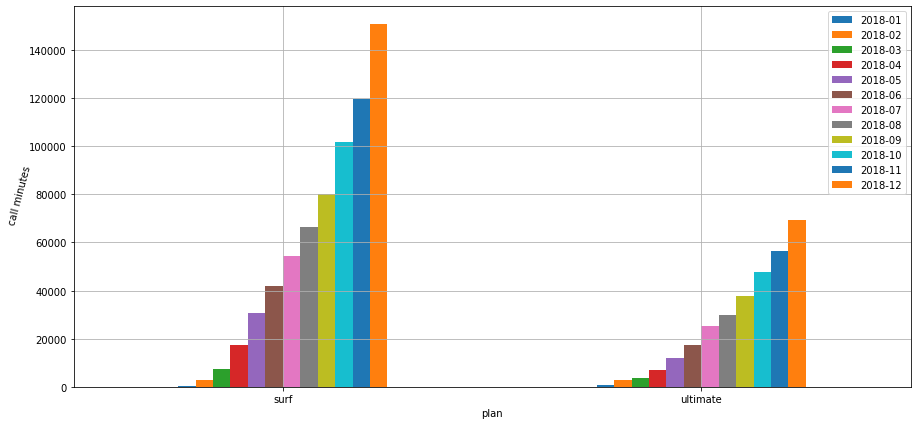

In [ ]:
# create bar plot for calls
plot_bar(dataset_calls,'call minutes')

It appears that calls increase every month from Jan to Dec durign 2018, both of Surf clients and Ultimate clients.

### Behavior in using internet

In [ ]:
# pivot table of internet
dataset_internet = to_pivot(dataset,'gb_used')
dataset_internet

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,52.0,186.0,357.0,741.0,1349.0,1682.0,2297.0,2766.0,3260.0,4063.0,4440.0,5469.0
ultimate,25.0,109.0,187.0,371.0,564.0,752.0,965.0,1146.0,1401.0,1886.0,2285.0,2963.0


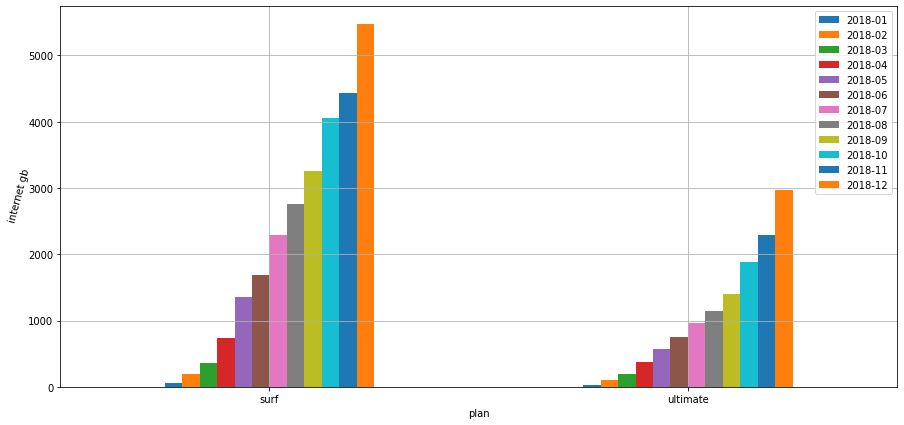

In [ ]:
# create bar plot for internet
plot_bar(dataset_internet,'internet gb')

It appears that internet use increase every month from Jan to Dec durign 2018, both of Surf clients and Ultimate clients.

### Behavior in using messages

In [ ]:
# pivot table of sms
dataset_sms = to_pivot(dataset,'sms')
dataset_sms

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,21.0,108.0,351.0,870.0,1849.0,2454.0,3271.0,4662.0,5968.0,8020.0,9165.0,12275.0
ultimate,62.0,151.0,243.0,463.0,931.0,1379.0,1937.0,2732.0,3259.0,4181.0,4903.0,6796.0


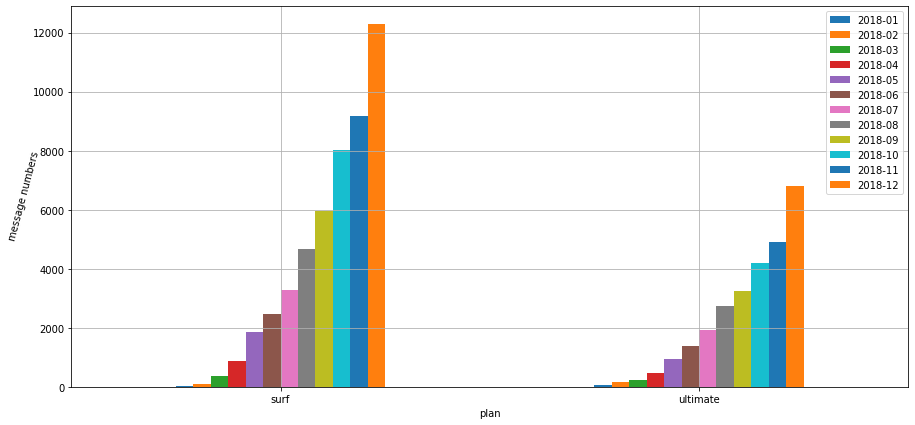

In [ ]:
# create bar plot for sms
plot_bar(dataset_sms, 'message numbers')

It appears that numbers of messaging increase every month from Jan to Dec durign 2018, both of Surf clients and Ultimate clients.

### Extra Use of Services

In the next step how clients from each plan use extra services beyond their allotment is analysed.

In [ ]:
# pivot table of extra minutes of call
dataset_exceed_minutes = to_pivot(dataset,value='exceed_minutes')
dataset_exceed_minutes

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,0.0,311.0,542.0,1764.0,4257.0,5177.0,8866.0,8922.0,9286.0,14175.0,16519.0,26856.0
ultimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


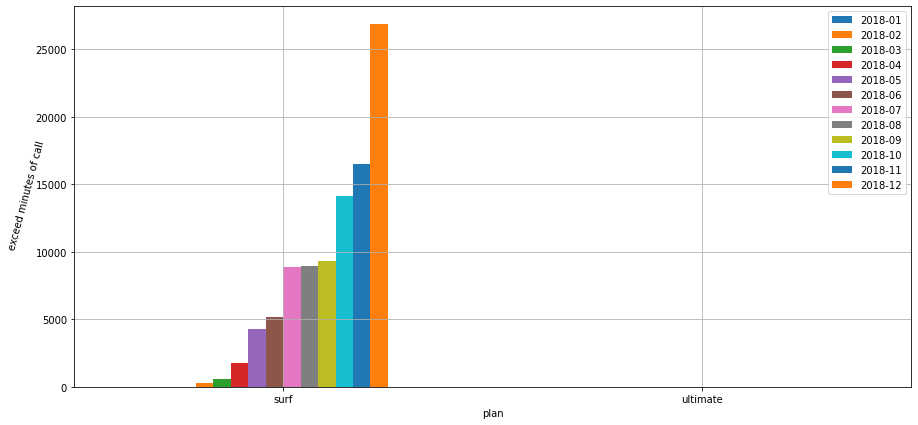

In [ ]:
# create bar plot for extra minutes of call
plot_bar(dataset_exceed_minutes, 'exceed minutes of call')

In [ ]:
# pivot table of extra numbers of message
dataset_exceed_messages = to_pivot(dataset,value='exceed_messages')
dataset_exceed_messages

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,0.0,8.0,13.0,87.0,322.0,483.0,586.0,973.0,1203.0,1986.0,1988.0,3382.0
ultimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


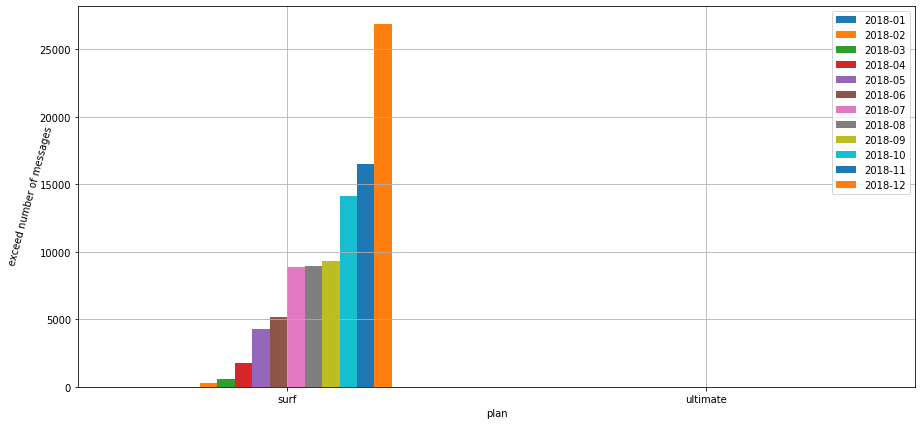

In [ ]:
# create bar plot for extra number of messages
plot_bar(dataset_exceed_minutes, 'exceed number of messages')

In [ ]:
# pivot table of extra gigabyte of internet data use
dataset_exceed_gb = to_pivot(dataset,value='exceed_gb')
dataset_exceed_gb

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,0.0,10.0,21.0,26.0,100.0,105.0,236.0,353.0,564.0,1025.0,1333.0,2237.0
ultimate,0.0,0.0,0.0,0.0,1.0,2.0,14.0,11.0,6.0,127.0,294.0,666.0


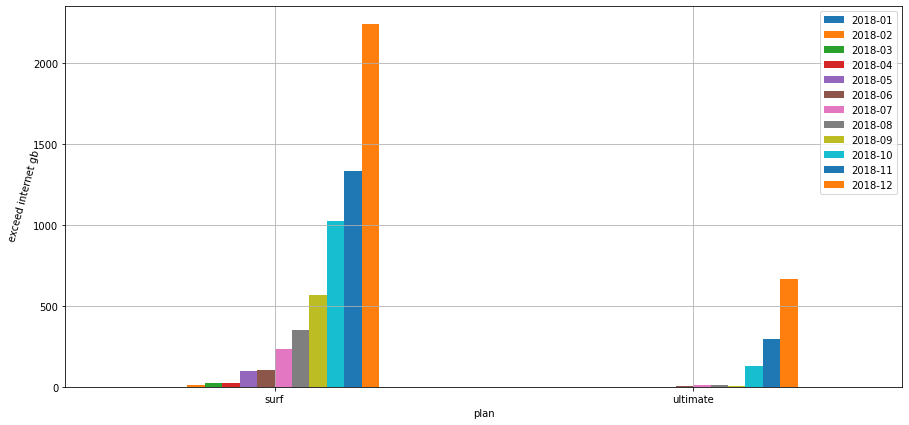

In [ ]:
# create bar plot for extra gigabyte of internet data
plot_bar(dataset_exceed_gb, 'exceed internet gb')

It appears that Surf clients enjoy extra use of service all for calls, messages, and internet. While Ultimate clients stick with their monthly allotment, except for internet service, yet still is very small compared to Surf.

### Total Actual vs Monthly Plan Payment

In [ ]:
# pivot table per total revenue
dataset_total_pay = to_pivot(dataset,value='total_usd_pay')
dataset_total_pay

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,380.0,969.57,2046.65,3515.53,5157.37,6159.8,8123.56,9866.85,12194.67,17214.83,20445.21,29877.14
ultimate,980.0,1960.00,3150.00,5390.00,6307.00,7294.0,8148.00,9457.00,10192.00,11389.00,12838.00,15652.00


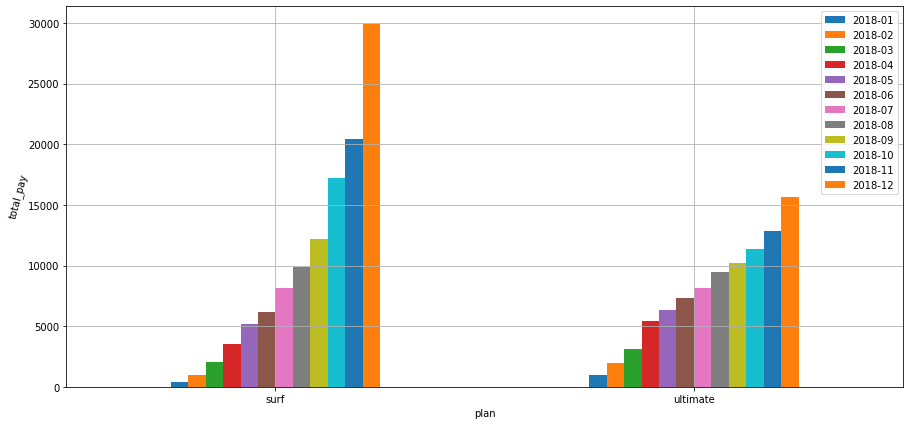

In [ ]:
# create bar plot for total_pay
plot_bar(dataset_total_pay,'total_pay')

In [ ]:
# pivot table per usd_monthly_pay
dataset_monthly_pay = to_pivot(dataset,value='usd_monthly_pay')
dataset_monthly_pay

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,380,860,1820,3200,4020,4940,5480,6040,6240,6480,6560,6600
ultimate,980,1960,3150,5390,6300,7280,8050,9380,10150,10500,10780,10990


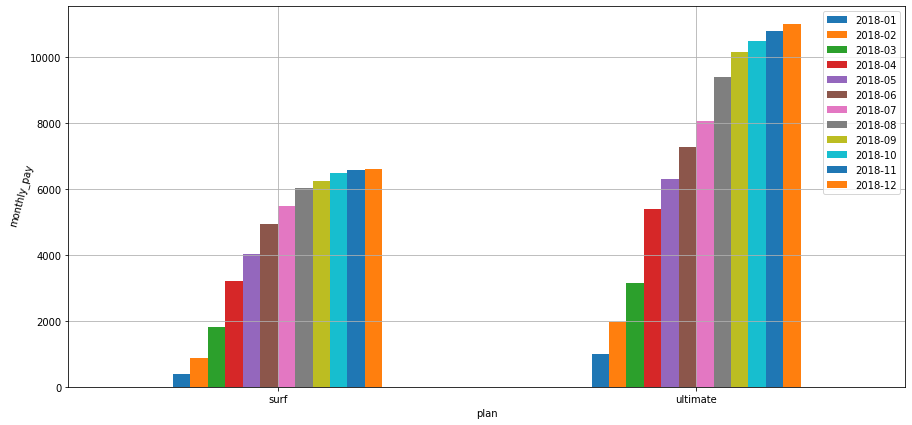

In [ ]:
# create bar plot for usd_monthly_pay
plot_bar(dataset_monthly_pay,'monthly_pay')

### Interim Conclusion

From month 1 to 6 in 2018, total payment of clients Ultimate is bigger than of Surf for a slight amount. But in month 7 to 12, Surf clients pay a lot more than Ultimate. 

This is contrary to the amount of monthly plan payment where Ultimate clients constantly pay higher for every month in 2018 compared to Surf. 

This means that although monthly payment plan for Surf is smaller than Ultimate, clients of Surf pay a lot more for extra services they use, especially during July to December.

From data visualisation on use of each of services by clients, it appears that for all the three services, clients of both Surf and Ultimate increase their use from Jan to Dec during 2018. The proportion of month-on-month increase in each of two plans looks similar.

In the next steps, hypothesis that average revenue of Ultimate and Surf being different will be tested.

Also will the hypothesis that average revenue of customers in NY-NJ being different from of other area.


## Testing the hypothesis

###  Surf vs Ultimate

In the next step, statistical descriptions for total payment by Surf and Ultimate are observed.

In [ ]:
# slice dataset only for total payment by Surf clients
dataset_surf = dataset.query('plan == "surf"').reset_index()
revenue_surf = dataset_surf['total_usd_pay']
revenue_surf.describe()

count    2631.000000
mean       44.071144
std        75.337937
min        20.000000
25%        20.000000
50%        20.000000
75%        26.405000
max      1530.000000
Name: total_usd_pay, dtype: float64

In [ ]:
# slice dataset only for total payment by Ultimate clients
dataset_ultimate = dataset.query('plan == "ultimate"').reset_index()
revenue_ultimate = dataset_ultimate['total_usd_pay']
revenue_ultimate.describe()

count    1213.000000
mean       76.469085
std        40.199380
min        70.000000
25%        70.000000
50%        70.000000
75%        70.000000
max       840.000000
Name: total_usd_pay, dtype: float64

In [ ]:
# Load variance
variance_surf = np.var(revenue_surf)
variance_ultimate = np.var(revenue_ultimate)
variance_surf, variance_ultimate

(5673.647453157128, 1614.6579478023525)

It appears that the means:
Surf     : around 44
Ultimate : around 76

And the standar deviations:
Surf     : around 75
Ultimate : around 40

And the variances:
Surf     : around 5,673
Ultimate : around 1,614

This means that Surf generates revenue in average of number of users per month that is smaller than Ultimate. 
Although number of monthly transactions of Surf are more than twice of Ultimate. And the variance of Surf is way higher than of Ultimate. This resulting in Surf contributing way more total revenue than Ultimate during the whole year 2018.

Next, the hypothesis will be tested using statistical ttest.

H0 = average revenue generated by Ultimate plan and Surf plan is not different

H1 = average revenue generated by Ultimate plan and Surf plan is different

In [ ]:
# testing the hypothesis using ttes_ind method
alpha = 0.05
results = st.ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject hypothesis null")
else:
    print("Fail to reject hypothesis null")

p-value: 6.90282694672477e-65
Reject hypothesis null


In testing hypothesis that Ultimate and Surf contribute average revenue differently, an independent test using scipy.stats.ttest_ind() method is applied. 

Alpha is set at 0.05%, that is the standard alpha.

Equal_var argument is set to false because there is a very large discrepancy between each sample's variance.

Result of the testing shows that H0 must be rejected. This means it can not be assumed that Ultimate plan and Surf plan generate the same amount of revenue.

From the means, it is known that average Ultimate revenue is higher than average Surf revenue.

### NY-NJ vs All Metropolitan America

In the next step, statistical descriptions for total payment by clients of NY-NJ and of the rest of toher cities are observed.

In [ ]:
# Load unique values in city
dataset['city'].unique()

array(['GA', 'WA', 'NV', 'OK', 'TX', 'CA', 'MI', 'FL', 'OH', 'IL-IN-WI',
       'TN', 'NY-NJ-PA', 'PA', 'DC-VA-MD-WV', 'IN', 'NE-IA',
       'PA-NJ-DE-MD', 'AL', 'NC-SC', 'CO', 'NM', 'MA-NH', 'AZ', 'OR-WA',
       'OH-KY-IN', 'SC', 'NY', 'TN-MS-AR', 'KY-IN', 'RI-MA', 'UT', 'HI',
       'CT', 'LA', 'VA-NC', 'MD', 'WI', 'VA', 'MO-IL', 'MN-WI', 'MO-KS',
       'NC'], dtype=object)

In [ ]:
# slice dataset only for total payment by NY-NJ-PA clients
dataset_NY_NJ = dataset.query('city == "NY-NJ-PA"').reset_index()
revenue_NY_NJ = dataset_NY_NJ['total_usd_pay']
revenue_NY_NJ.describe()

count    635.000000
mean      54.324961
std       74.753385
min       20.000000
25%       20.000000
50%       20.690000
75%       70.000000
max      752.550000
Name: total_usd_pay, dtype: float64

In [ ]:
# slice dataset only for total payment by clients in cities other than NY-NJ-PA
dataset_other = dataset.query('city != "NY-NJ-PA"').reset_index()
revenue_other = dataset_other['total_usd_pay']
revenue_other.describe()

count    3209.000000
mean       54.288510
std        66.565508
min        20.000000
25%        20.000000
50%        26.330000
75%        70.000000
max      1530.000000
Name: total_usd_pay, dtype: float64

In [ ]:
# Load variance
variance_NY_NJ = np.var(revenue_NY_NJ)
variance_other = np.var(revenue_other)
variance_NY_NJ, variance_other

(5579.268434132308, 4429.586021526924)

In [ ]:
# testing the hypothesis using ttes_ind method
alpha = 0.05
results = st.ttest_ind(revenue_NY_NJ, revenue_other, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject hypothesis null")
else:
    print("Fail to reject hypothesis null")

p-value: 0.9908881048125877
Fail to reject hypothesis null


In testing hypothesis that New York - New Jersey clients contribute average revenue that is different from average revenue of clients in other cities, an independent test using scipy.stats.ttest_ind() method is applied.

Alpha is set at 0.05%, that is the standard alpha.

Equal_variance argument is set to false because there is enough discrepancy between each sample's variance.

Result of the testing shows that H0 can not be rejected. This means it can be assumed that New York - New Jersey clients contribute the same average amount of revenue like the rest of other cities.


## Final Conclusion

The start of this analysis is pre-processing, with steps:
1. Checking missing values, duplicates, and mismatch data type
2. Merging all needed tables
3. Adding more columns that are needed in furher feature engineering and analysis, that is:
    i. month generating revenue
    ii. extra service used
    iii. additional charges for extra service
    iv. total payment including all additional charges

The first analysis done is Exploratory Data Analysis (EDA), it appears that:
1. For all the three services, clients of both Surf and Ultimate increase their use from Jan to Dec during 2018. The proportion of month-on-month increase in each of two plans looks similar.
2. During month 1 to 6 in 2018, total payment of clients Ultimate is bigger than of Surf for a slight amount. But in month 7 to 12, Surf clients pay a lot more than Ultimate. This is contrary to the amount of monthly plan payment where Ultimate clients constantly pay higher for every month in 2018 compared to Surf. This means that although monthly payment plan for Surf is smaller than Ultimate, clients of Surf pay a lot more for extra services they use, especially during July to December.
3. Surf clients enjoy extra use of service all for calls, messages, and internet. While Ultimate clients stick with their monthly allotment, except for internet service, yet still is very small compared to Surf.

The next analysis is statistical analysis, it is known that:
1. Average revenue generated from clients of Surf is different from of Ultimate
2. Average revenue generated from clients of New York - New Jersey is the same with of other cities